In [134]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
from mpl_toolkits.mplot3d import Axes3D
import scipy.io as sio
import joypy


In [135]:
%matplotlib widget

In [136]:
folder='20230804'
ms=4

# Use glob.glob to list all files in the directory with a specific pattern
data_files = glob.glob('/Volumes/PortableSSD/Archives_EPFL/2023_BC/bc002/raw/'+folder+f"/ms{'{:03}'.format(ms)}*_2.mat")

print(data_files)

import re

def extract_number(file_name):
    match = re.search(r'ms002mpt(\d+)_2.mat', file_name)
    if match:
        return int(match.group(1))
    return 0  # Return 0 if no match is found

# Sort the list of file names using the custom sorting key
sorted_file_names = sorted(data_files, key=extract_number)
print(sorted_file_names)


['/Volumes/PortableSSD/Archives_EPFL/2023_BC/bc002/raw/20230804/ms004mpt001_2.mat', '/Volumes/PortableSSD/Archives_EPFL/2023_BC/bc002/raw/20230804/ms004mpt002_2.mat', '/Volumes/PortableSSD/Archives_EPFL/2023_BC/bc002/raw/20230804/ms004mpt003_2.mat', '/Volumes/PortableSSD/Archives_EPFL/2023_BC/bc002/raw/20230804/ms004mpt004_2.mat', '/Volumes/PortableSSD/Archives_EPFL/2023_BC/bc002/raw/20230804/ms004mpt005_2.mat']
['/Volumes/PortableSSD/Archives_EPFL/2023_BC/bc002/raw/20230804/ms004mpt001_2.mat', '/Volumes/PortableSSD/Archives_EPFL/2023_BC/bc002/raw/20230804/ms004mpt002_2.mat', '/Volumes/PortableSSD/Archives_EPFL/2023_BC/bc002/raw/20230804/ms004mpt003_2.mat', '/Volumes/PortableSSD/Archives_EPFL/2023_BC/bc002/raw/20230804/ms004mpt004_2.mat', '/Volumes/PortableSSD/Archives_EPFL/2023_BC/bc002/raw/20230804/ms004mpt005_2.mat']


In [137]:
dataframes=[]
for file in sorted_file_names:

    mat_data=sio.loadmat(file)
    df=pd.DataFrame()
    df['Ct']=mat_data['state'][:,0]
    df['Cr']=mat_data['state'][:,1]
    df['Cr_T/5']=mat_data['state'][:,2]
    df['action']=mat_data['action'][0]
    df['action_abs']=mat_data['action_abs'][0]
    df['reward']=mat_data['reward'][0]
    df['time_action']=mat_data['time_action'][0]
    df['phase_action']=mat_data['phase_action'][0]
    dataframes.append(df)
stacked_df = pd.concat(dataframes, axis=0)

# Reset the index of the stacked DataFrame if needed
stacked_df.reset_index(drop=True, inplace=True)
df=stacked_df

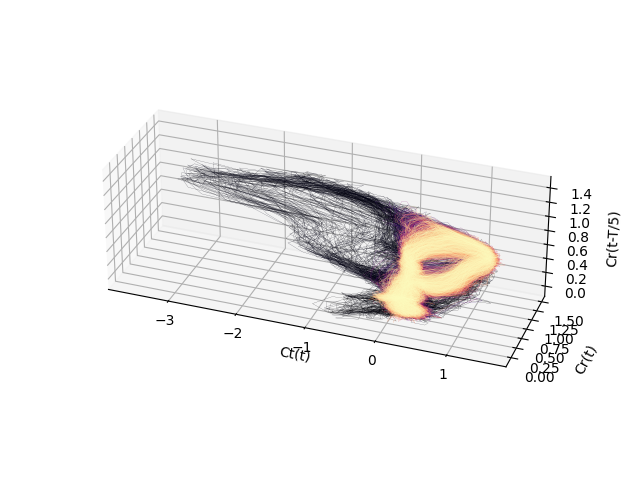

In [138]:

x=df['Ct'].values
y=df['Cr'].values
z=df['Cr_T/5'].values
# Create a figure and a 3D axes object
fig_state = plt.figure()
# ax = Axes3D(fig)
ax_state = fig_state.add_subplot(111, projection='3d')

ax_state.set_box_aspect([np.ptp(x), np.ptp(y), np.ptp(z)])
ax_state.set_xlabel('Ct(t)')
ax_state.set_ylabel('Cr(t)')
ax_state.set_zlabel('Cr(t-T/5)')
indices = list(range(0,len(x)))
plotlist=[]
# Create a colormap based on the indices
color_map = plt.cm.magma(indices)
for i in range(0,len(x),450):
    # print(int(i/len(x)*255))

    a=ax_state.plot(x[i:i+450], y[i:i+450], z[i:i+450], color=color_map[int(i/len(x)*255)],linewidth=0.1)
    plotlist.append(a)
ax_state.view_init(elev=30, azim=290)

fig_state.tight_layout()
# plt.show()
# plt.savefig(f"RB_{folder}_ms{'{:03}'.format(ms)}_2.png",dpi=300)

Points within the sphere: 413


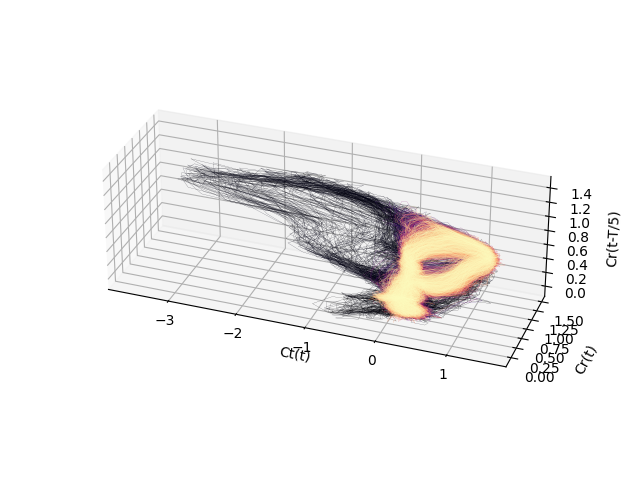

In [139]:

# Center of the sphere (you can specify your desired coordinates)
center_x = 1.1
center_y = 0.69
center_z = 0.78

center_x = 0.2
center_y = 0.17
center_z = 0.26
# Radius of the sphere
r = 0.05

# Calculate the Euclidean distance from each data point to the center
distances = np.sqrt((x - center_x)**2 + (y - center_y)**2 + (z - center_z)**2)

# Select data points that are within the sphere
points_within_sphere = np.where(distances <= r)

# Extract the coordinates of the points within the sphere
x_within_sphere = x[points_within_sphere]
y_within_sphere = y[points_within_sphere]
z_within_sphere = z[points_within_sphere]

# Print or use the points_within_sphere as needed
print(f"Points within the sphere: {len(x_within_sphere)}")

    
    

# Plot the sphere
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)
x_sphere = r * np.outer(np.cos(u), np.sin(v)) + center_x
y_sphere = r * np.outer(np.sin(u), np.sin(v)) + center_y
z_sphere = r * np.outer(np.ones(np.size(u)), np.cos(v)) + center_z
ax.plot_surface(x_sphere, y_sphere, z_sphere, color='r', alpha=0.5, label='Sphere')



# Show the plot
plt.show()


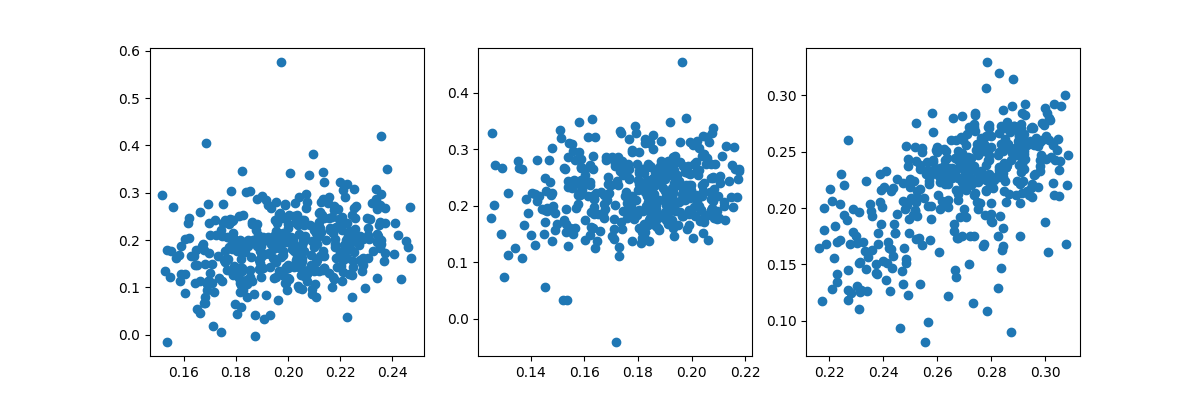

In [140]:
fig = plt.figure(figsize=(12, 4))

ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)
for index in points_within_sphere:
    ax1.scatter(x[index],x[index+1])
    ax2.scatter(y[index],y[index+1])
    ax3.scatter(z[index],z[index+1])
plt.show()
    


(-6.0, 6.0)

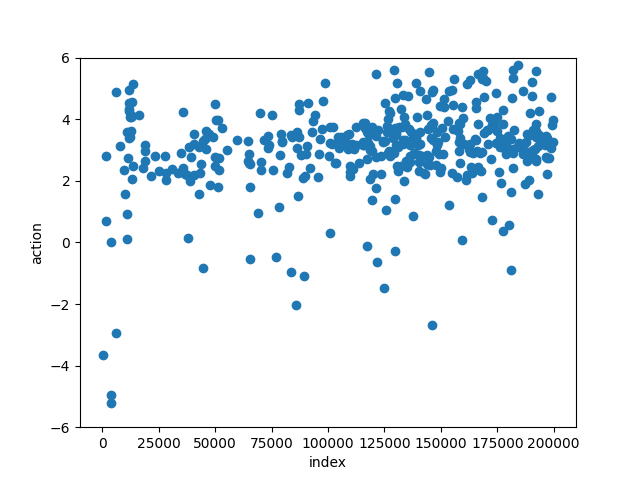

In [141]:
plt.figure()
plt.scatter(np.transpose(points_within_sphere),df['action'].values[points_within_sphere])
plt.xlabel('index')
plt.ylabel('action')
plt.ylim([-6,6])

In [142]:
action = df['action'].values

# Define a threshold for "closeness"
threshold = 1 # Adjust this threshold as needed
target=np.mean(df['action'].values[points_within_sphere])
# Filter points within the sphere based on the 'action' values
filtered_points = []

for i in points_within_sphere[0]:
    if abs(action[i] - target) < threshold:
        filtered_points.append(i)

filtered_points = np.array(filtered_points)

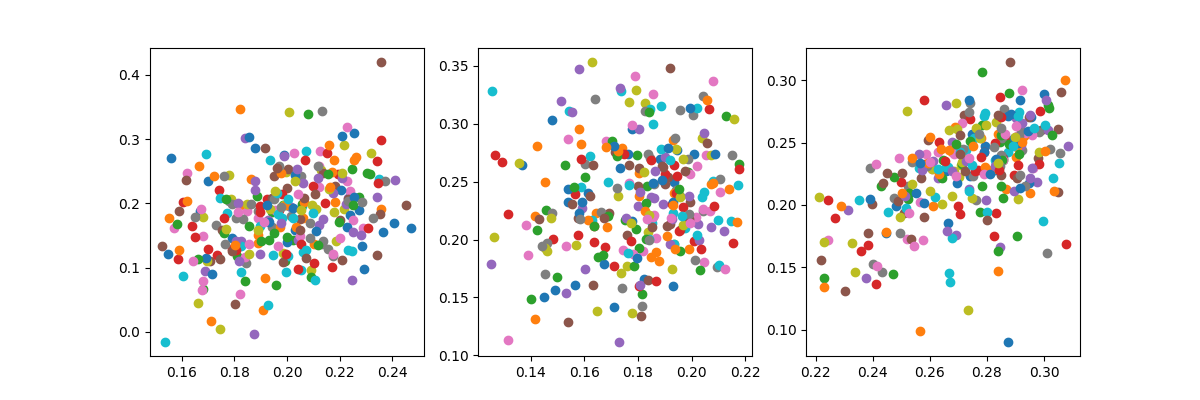

In [143]:
fig = plt.figure(figsize=(12, 4))

ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)
for index in filtered_points:
    ax1.scatter(x[index],x[index+1])
    ax2.scatter(y[index],y[index+1])
    ax3.scatter(z[index],z[index+1])
plt.show()

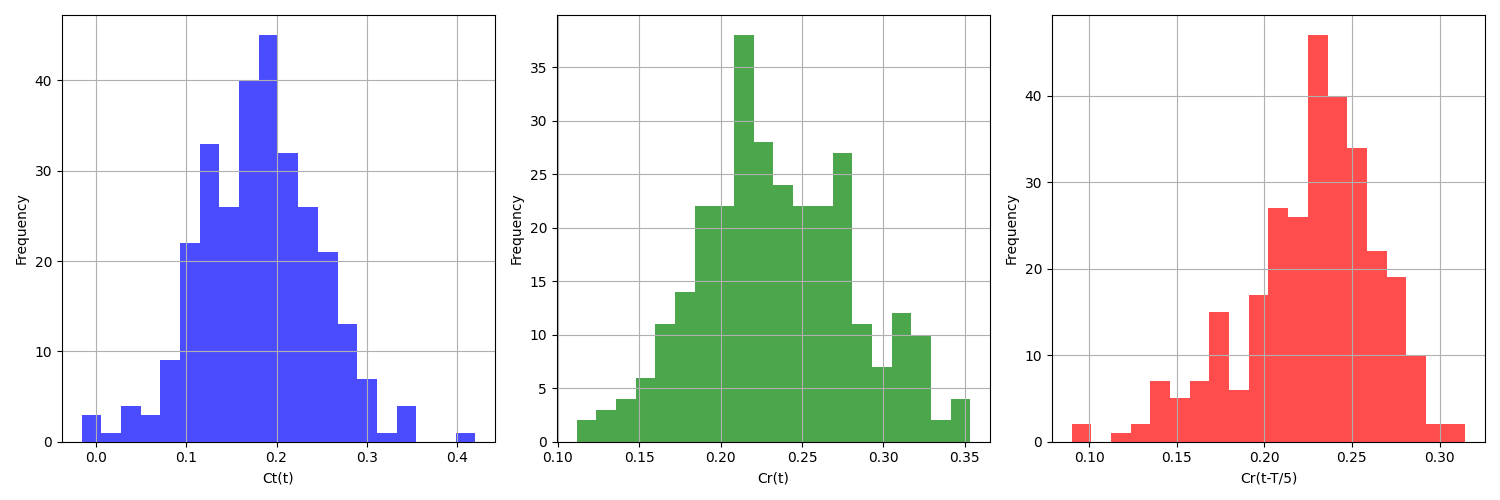

In [144]:
import matplotlib.pyplot as plt
import numpy as np

# Generate some random data for the histograms
data1 = x[filtered_points+1]
data2 = y[filtered_points+1]  
data3 = z[filtered_points+1] 

# Create a figure with three subplots
figs, axs = plt.subplots(1, 3, figsize=(15, 5))

# Create histograms for each subplot
axs[0].hist(data1, bins=20, color='blue', alpha=0.7)

axs[0].set_xlabel('Ct(t)')
axs[0].set_ylabel('Frequency')
axs[0].grid(True)

axs[1].hist(data2, bins=20, color='green', alpha=0.7)

axs[1].set_xlabel('Cr(t)')
axs[1].set_ylabel('Frequency')
axs[1].grid(True)

axs[2].hist(data3, bins=20, color='red', alpha=0.7)

axs[2].set_xlabel('Cr(t-T/5)')
axs[2].set_ylabel('Frequency')
axs[2].grid(True)

# Adjust spacing between subplots
plt.tight_layout()

# Show the subplots
plt.show()


In [145]:
# dfs=pd.DataFrame({'Ct': data1, 'Cr': data2, 'Cr_delay': data3})

# plt.figure(dpi= 300)
# joypy.joyplot(dfs)


Optimal trajectory

In [146]:
folder='20230823'
ms=3

# Use glob.glob to list all files in the directory with a specific pattern
data_files = glob.glob('/Volumes/PortableSSD/Archives_EPFL/2023_BC/bc002/raw/'+folder+f"/ms{'{:03}'.format(ms)}*_2.mat")

print(data_files)

import re

def extract_number(file_name):
    match = re.search(r'ms002mpt(\d+)_2.mat', file_name)
    if match:
        return int(match.group(1))
    return 0  # Return 0 if no match is found

# Sort the list of file names using the custom sorting key
sorted_file_names = sorted(data_files, key=extract_number)
print(sorted_file_names)

dataframes=[]
for file in sorted_file_names:

    mat_data=sio.loadmat(file)
    df=pd.DataFrame()
    df['Ct']=mat_data['state'][:,0]
    df['Cr']=mat_data['state'][:,1]
    df['Cr_T/5']=mat_data['state'][:,2]
    df['action']=mat_data['action'][0]
    df['action_abs']=mat_data['action_abs'][0]
    df['reward']=mat_data['reward'][0]
    df['time_action']=mat_data['time_action'][0]
    df['phase_action']=mat_data['phase_action'][0]
    dataframes.append(df)
stacked_df = pd.concat(dataframes, axis=0)

# Reset the index of the stacked DataFrame if needed
stacked_df.reset_index(drop=True, inplace=True)
df=stacked_df




# x=df['Ct'].values
# y=df['Cr'].values
# z=df['Cr_T/5'].values
# # Create a figure and a 3D axes object
# fig = plt.figure()
# # ax = Axes3D(fig)
# ax = fig.add_subplot(111, projection='3d')

# ax.set_box_aspect([np.ptp(x), np.ptp(y), np.ptp(z)])
# ax.set_xlabel('Ct(t)')
# ax.set_ylabel('Cr(t)')
# ax.set_zlabel('Cr(t-T/5)')
# indices = list(range(0,len(x)))
# plotlist=[]
# # Create a colormap based on the indices
# color_map = plt.cm.magma(indices)
# for i in range(0,len(x),450):
#     # print(int(i/len(x)*255))

#     a=ax.plot(x[i:i+450], y[i:i+450], z[i:i+450], color=color_map[int(i/len(x)*255)],linewidth=0.1)
#     plotlist.append(a)
# ax.view_init(elev=30, azim=290)

# fig.tight_layout()
# plt.show()
# plt.savefig(f"RB_{folder}_ms{'{:03}'.format(ms)}_2.png",dpi=300)

['/Volumes/PortableSSD/Archives_EPFL/2023_BC/bc002/raw/20230823/ms003mpt001_2.mat']
['/Volumes/PortableSSD/Archives_EPFL/2023_BC/bc002/raw/20230823/ms003mpt001_2.mat']


0        3
1        4
2        6
3        8
4        9
        ..
4995    43
4996    44
4997    46
4998    47
4999    48
Name: phase_bin, Length: 5000, dtype: int64


/var/folders/59/c33c5qws1kq2bzd64091tys40000gn/T/ipykernel_1825/2640416461.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  phase_averages = phase_averages.append(phase_averages.iloc[0], ignore_index=True)


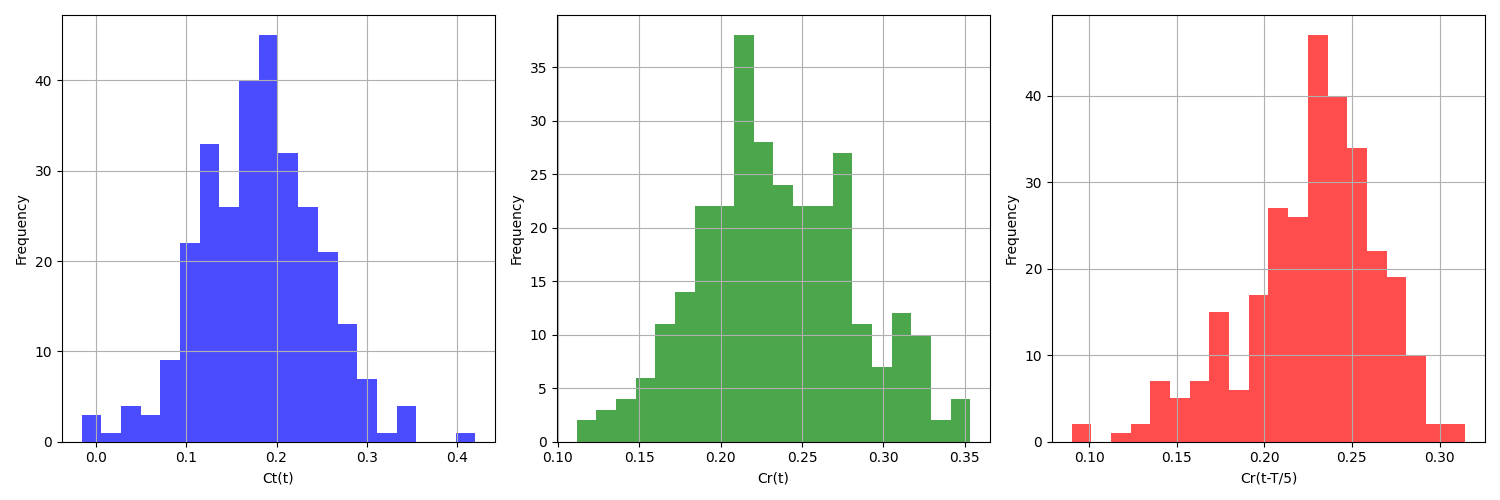

In [150]:
num_bins = 50 # 360 degrees / 45 degrees per bin
bin_edges = np.linspace(0, 360, num_bins + 1)
df['phase_bin'] = np.digitize(df['phase_action'], bin_edges)
print(df['phase_bin'])

# Group by phase bins and calculate the phase averages
phase_averages = df.groupby('phase_bin').agg({'phase_action': 'mean', 'Ct' :'mean', 'Cr': 'mean', 'Cr_T/5': 'mean'}).reset_index()
phase_averages = phase_averages.append(phase_averages.iloc[0], ignore_index=True)


x=phase_averages['Ct'].values
y=phase_averages['Cr'].values
z=phase_averages['Cr_T/5'].values

ax_state.plot(x, y, z, color='k',linewidth=1)

ax_state.view_init(elev=30, azim=290)
fig_state.savefig(f"RB_{folder}_ms{'{:03}'.format(ms)}_with_opt_1.png",dpi=300)
ax_state.view_init(elev=0, azim=340)
fig_state.savefig(f"RB_{folder}_ms{'{:03}'.format(ms)}_with_opt_2.png",dpi=300)
ax_state.view_init(elev=80, azim=290)
fig_state.savefig(f"RB_{folder}_ms{'{:03}'.format(ms)}_with_opt_3.png",dpi=300)


plt.show()